<a href="https://colab.research.google.com/github/purvikabajaj/Convolutional-Neural-Networks/blob/master/CNN_Rock%2C_Paper%2C_Scissor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-08-18 13:53:06--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.128, 108.177.111.128, 142.250.1.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  58.4MB/s    in 3.3s    

2020-08-18 13:53:10 (58.4 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-08-18 13:53:12--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.219.128, 172.217.212.128, 172.217.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.219.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to

In [2]:
import os
import zipfile

In [3]:
local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [4]:
local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [5]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissor_dir = os.path.join('/tmp/rps/scissors')

In [6]:
rock_names = os.listdir(rock_dir)
print(rock_names[:10])

paper_names = os.listdir(paper_dir)
print(paper_names[:10])

scissor_names = os.listdir(scissor_dir)
print(scissor_names[:10])

['rock04-032.png', 'rock06ck02-030.png', 'rock04-073.png', 'rock06ck02-043.png', 'rock03-053.png', 'rock02-019.png', 'rock06ck02-059.png', 'rock06ck02-075.png', 'rock05ck01-103.png', 'rock06ck02-016.png']
['paper05-061.png', 'paper02-064.png', 'paper01-098.png', 'paper02-076.png', 'paper01-091.png', 'paper04-058.png', 'paper07-002.png', 'paper04-097.png', 'paper06-078.png', 'paper07-065.png']
['scissors04-074.png', 'testscissors02-069.png', 'testscissors02-008.png', 'testscissors02-095.png', 'scissors03-003.png', 'testscissors01-076.png', 'testscissors03-010.png', 'testscissors03-097.png', 'scissors01-052.png', 'testscissors03-046.png']


In [7]:
print('No. of rock training images: ', len(os.listdir(rock_dir)))
print('No. of paper training images: ', len(os.listdir(paper_dir)))
print('No. of scissor training images: ', len(os.listdir(scissor_dir)))

No. of rock training images:  840
No. of paper training images:  840
No. of scissor training images:  840


In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    height_shift_range = 0.2,
    width_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

train_generator = train_datagen.flow_from_directory(
    '/tmp/rps/',
    target_size = (150,150),
    batch_size = 126,
    class_mode = 'categorical'
)

Found 2520 images belonging to 3 classes.


In [11]:
import matplotlib.pyplot as plt

(150, 150, 3)


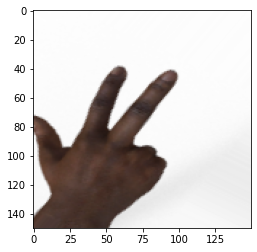

In [12]:
x, y = train_generator.next()
for i in range (0,1):
  images = x[i]
  plt.imshow(images)
  print(images.shape)

In [13]:
validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

validation_generator = validation_datagen.flow_from_directory(
    '/tmp/rps-test-set',
    target_size = (150,150),
    batch_size = 126,
    class_mode = 'categorical'
)

Found 372 images belonging to 3 classes.


(150, 150, 3)


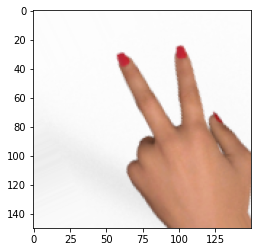

In [14]:
x, y = validation_generator.next()
for i in range(0,1):
  images = x[i]
  plt.imshow(images)
  print(images.shape)

In [15]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(3, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [17]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [18]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 20,
    epochs = 15,
    validation_data = validation_generator,
    validation_steps = 3
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
20/20 [==============================] - 146s 7s/step - loss: 1.1084 - accuracy: 0.3813 - val_loss: 1.0592 - val_accuracy: 0.4382
Epoch 2/15
20/20 [==============================] - 143s 7s/step - loss: 0.9466 - accuracy: 0.5373 - val_loss: 0.6828 - val_accuracy: 0.7231
Epoch 3/15
20/20 [==============================] - 143s 7s/step - loss: 0.6461 - accuracy: 0.7250 - val_loss: 0.5116 - val_accuracy: 0.8065
Epoch 4/15
20/20 [==============================] - 143s 7s/step - loss: 0.4550 - accuracy: 0.8183 - val_loss: 0.5366 - val_accuracy: 0.7151
Epoch 5/15
20/20 [==============================] - 145s 7s/step - loss: 0.4006 - accuracy: 0.8377 - val_loss: 0.3707 - val_accuracy: 0.8763
Epoch 6/15
20/20 [==============================] - 143s 7s/step - loss: 0.2574 - accuracy: 0.9067 - val_loss: 0.3366 - val_accuracy: 0.8763
Epoch 7/15
20/20 [==============================] - 143s 7s/step - loss: 0.261

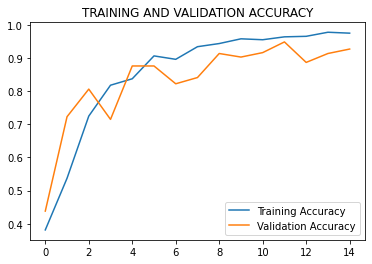

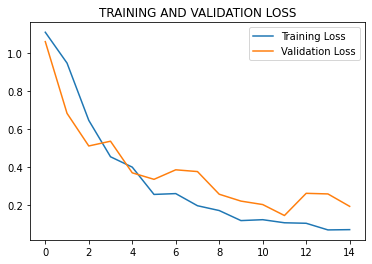

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, label = 'Training Accuracy')
plt.plot(epochs, val_acc, label = 'Validation Accuracy')
plt.title('TRAINING AND VALIDATION ACCURACY')
plt.legend()

plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label = 'Training Loss')
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.title('TRAINING AND VALIDATION LOSS')
plt.legend()

In [20]:
import numpy as np

In [21]:
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/'+fn
  img = image.load_img(path, target_size = (150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)
  print(fn)
  print(classes)

Saving scissors9.png to scissors9.png
scissors9.png
[[0. 0. 1.]]
